<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/GEMINI_MULTIMODAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMAGE2TEXT

In [4]:
# Install the library, import dependencies, and configure the API.
# Be sure to have your GEMINI_API_KEY saved in Colab Secrets.
#!pip install -q -U google-generativeai
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
from io import BytesIO
import requests

# Access the API key from Colab Secrets.
GEMINI_API_KEY = userdata.get('GEMINI')
genai.configure(api_key=GEMINI_API_KEY)

# Use a sample image from the web (or replace with your own local file).
# This code block gets a sample image and converts it into a PIL Image object.
image_url = 'https://picsum.photos/seed/picsum/600/400'
response = requests.get(image_url)
img = PIL.Image.open(BytesIO(response.content))

# Define the multimodal prompt.
# The prompt is a list containing both the text and the image.
prompt_parts = [
    "Write a short, engaging blog post based on this picture, focusing on the subject's personality.",
    img
]

# Create the GenerativeModel object and generate the content.
model = genai.GenerativeModel('gemini-2.5-flash')
response = model.generate_content(prompt_parts, stream=True)
response.resolve()

# Print the generated text.
print(response.text)

## Beyond the Peak: What Does This Mountain's Personality Tell Us?

Some landscapes don't just exist; they *preside*. Looking at this stunning image, it's impossible not to feel the profound personality emanating from that magnificent peak. This isn't just a collection of rock and snow; it's a stoic, ancient soul.

**The Unwavering Sentinel:** Our mountain here possesses an undeniable quiet strength. Its sharp, defined silhouette speaks of an unyielding will, a refusal to be swayed by the passing whims of wind or storm. It stands tall, a proud, solitary guardian surveying the vast, hushed landscape. There's a confidence in its posture, an inherent knowledge of its own power and permanence. It doesn't need to boast; its very existence is a testament to resilience.

**The Ancient Observer:** Yet, despite its formidable presence, there's a profound serenity to it. Bathed in the ethereal glow of what looks like dawn or dusk, with soft pinks and purples caressing the clouds, the mountain be

## TEXT2IMAGE

In [ ]:
!pip install colab-env -q
import colab_env

In [ ]:
import json
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from google.colab import auth
from google.cloud import aiplatform
import colab_env
import os

# ** Data Preparation**

# Authentication and Initialization**
PROJECT_ID = os.environ["GOOGLE_CLOUD_PROJECT"]
REGION = os.environ["GOOGLE_CLOUD_REGION"]
BUCKET_NAME = os.environ["GOOGLE_CLOUD_BUCKET_NAME"]

print('\n\n')
print(f"Project ID: {PROJECT_ID}")
print(f"Region: {REGION}")
print(f"Bucket Name: {BUCKET_NAME}")
print('\n\n')


In [ ]:
# Import libraries.
import vertexai
from vertexai.preview.vision_models import ImageGenerationModel
import os

# Replace with your own project ID and location.
PROJECT_ID = os.getenv('GOOGLE_CLOUD_PROJECT')
print(PROJECT_ID)
LOCATION = "us-central1"

Generating image for prompt: 'A fantastical, cyberpunk cityscape at night with neon lights reflecting off wet streets.'...

Image generated successfully and saved as generated_image.png


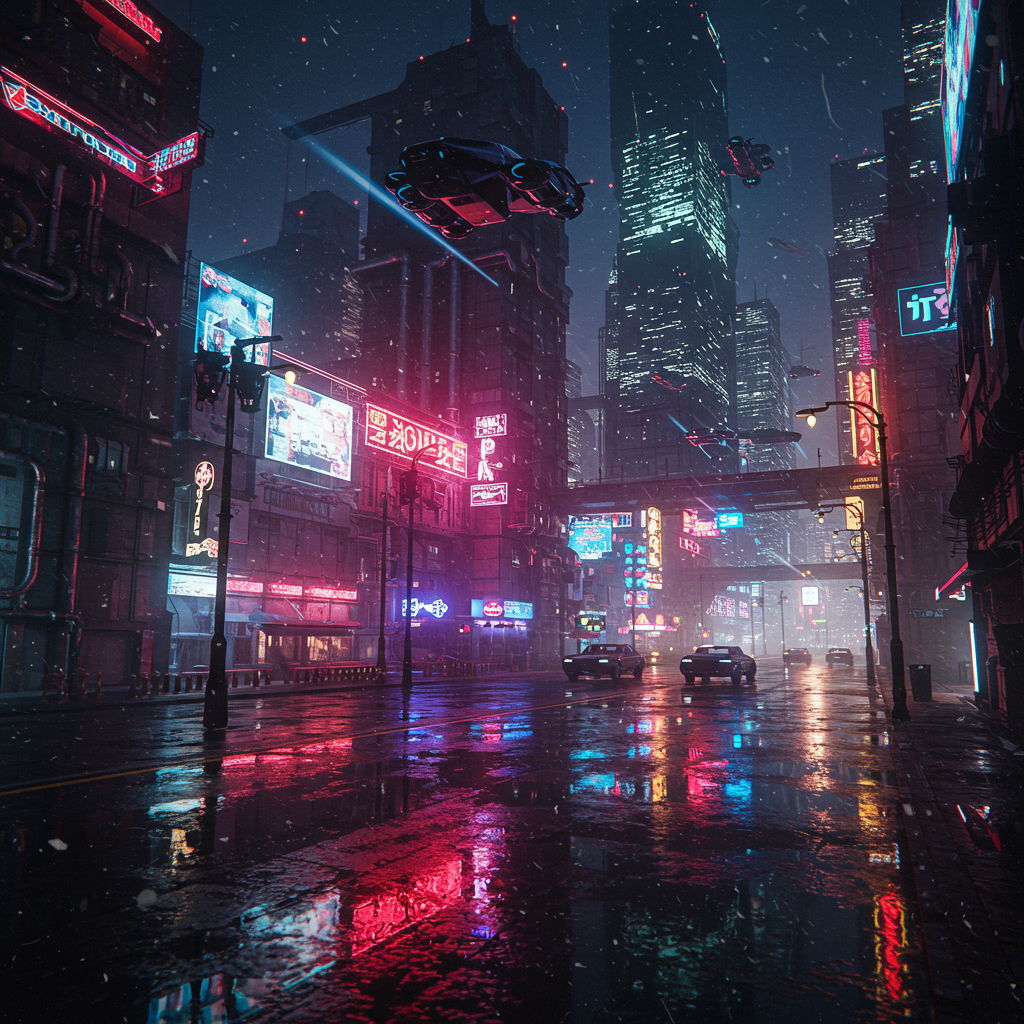

In [25]:
# Initialize Vertex AI.
# This assumes you have authenticated your environment (e.g., via `gcloud auth login`).
vertexai.init(project=PROJECT_ID, location=LOCATION)

# Define the text prompt for image generation.
prompt = "A fantastical, cyberpunk cityscape at night with neon lights reflecting off wet streets."



# Create an ImageGenerationModel object.
model = ImageGenerationModel.from_pretrained("imagen-3.0-generate-002")

# Generate the images.
# The `number_of_images` parameter can be used to generate multiple images at once.
print(f"Generating image for prompt: '{prompt}'...")
images = model.generate_images(prompt=prompt, number_of_images=1)

# Save and display the generated image.
if images:
    output_file = "generated_image.png"
    images[0].save(location=output_file)
    print(f"\nImage generated successfully and saved as {output_file}")

    # Use IPython.display to show the image in a Colab notebook.
    from IPython.display import Image, display
    display(Image(filename=output_file))
else:
    print("\nFailed to generate image.")